# modul 2

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Script di atas digunakan untuk mengimpor beberapa library yang akan digunakan untuk melakukan pengolahan citra. matplotlib.pyplot digunakan untuk membuat visualisasi data seperti grafik, plot, dan diagram. numpy digunakan untuk melakukan komputasi numerik, seperti operasi matematika dan statistik pada array dan matriks. cv2 digunakan untuk membaca bahkan memanipulasi gambar. Lalu pandas digunakan untuk menganalisis dan memanipulasi data.

Script dibawah ini menampilkan citra aktivis yang berada pada folder lokal atau lokasi yang sama dengan file jurnal ini.

(1294, 2722, 3)


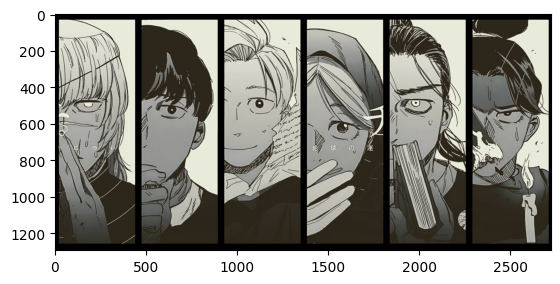

In [ ]:
aktvs=plt.imread("aktivis.jpg")
plt.imshow(aktvs)
print(aktvs.shape)


## 1. MENGURUTKAN CITRA

# a. Memotong atau membagi citra

Script dibawah ini digunakan untuk membagi atau memotong masing masing bagian citra aktvs sesuai dengan bagian masing masing karakter yang ditentukan. Citra aktvs tersebut dibagi menjadi 6 bagian sesuai dengan slot masing masing karakter. karakter tersebut ialah badeni, oczy, rafal, jalenta, draka, dan albert.

(1200, 420, 3)


(np.float64(-0.5), np.float64(419.5), np.float64(1199.5), np.float64(-0.5))

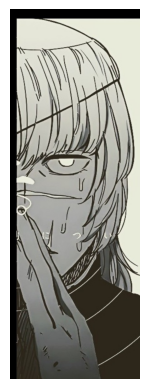

In [ ]:
badeni=aktvs[0: 1200, 0:420 ]
plt.imshow(badeni)
print(badeni.shape)
plt.axis("off")

(1200, 430, 3)


(np.float64(-0.5), np.float64(429.5), np.float64(1199.5), np.float64(-0.5))

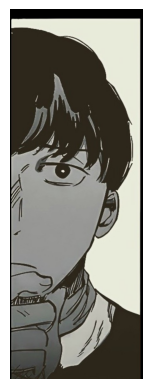

In [ ]:
albert=aktvs[0: 1200,470:900 ]
plt.imshow(albert)
print(albert.shape)
plt.axis("off")

(1200, 430, 3)


(np.float64(-0.5), np.float64(429.5), np.float64(1199.5), np.float64(-0.5))

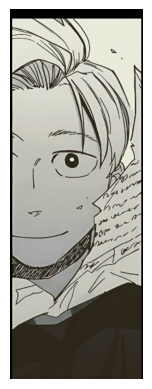

In [ ]:
rafal=aktvs[0: 1200,920:1350 ]
plt.imshow(rafal)
print(rafal.shape)
plt.axis("off")

(1200, 430, 3)


(np.float64(-0.5), np.float64(429.5), np.float64(1199.5), np.float64(-0.5))

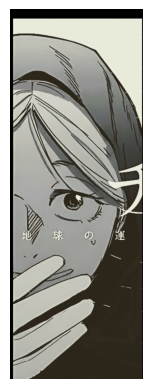

In [ ]:
jalenta=aktvs[0: 1200,1370:1800 ]
plt.imshow(jalenta)
print(jalenta.shape)
plt.axis("off")

(1200, 430, 3)


(np.float64(-0.5), np.float64(429.5), np.float64(1199.5), np.float64(-0.5))

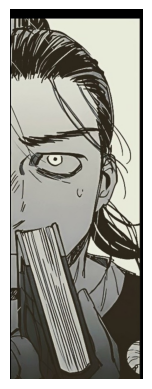

In [ ]:
oczy=aktvs[0: 1200,1830:2260 ]
plt.imshow(oczy)
print(oczy.shape)
plt.axis("off")

(1200, 442, 3)


(np.float64(-0.5), np.float64(441.5), np.float64(1199.5), np.float64(-0.5))

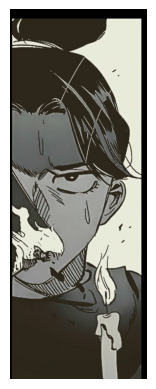

In [ ]:
draka=aktvs[0: 1200,2280:2750]
plt.imshow(draka)
print(draka.shape)
plt.axis("off")

# b. Penggabungan
Untuk menggabungkan gambar terdapat beberapa cara penggunaan, dapat menggunakan fungsi buatan ataupun fungsi bawaan langsung dari library cv2 dan numpy.  

Script dibawah ini merupakan fungsi penggabungan 6 citra secara horizontal. setiap citra akan dipastikan tingginya sama dan lebar citra penggabungan dengan menjumlahkan lebar dari semua citra. penggunaan perulangan  for untuk mengatur susunan dari citra sesuai yang diinginkan.  

In [ ]:
def gabung_horizontal(img1, img2, img3, img4, img5, img6):
    tinggi_max = max(img1.shape[0], img2.shape[0], img3.shape[0], img4.shape[0], img5.shape[0], img6.shape[0])
    lebar_total = img1.shape[1] + img2.shape[1] + img3.shape[1] + img4.shape[1] + img5.shape[1] + img6.shape[1]

    result = np.zeros((tinggi_max, lebar_total, 3), dtype=np.uint8)
    
    posisi_x = 0
    for img in [img1, img2, img3, img4, img5, img6]:
        h, w = img.shape[0], img.shape[1]
        result[0:h, posisi_x:posisi_x + w] = img
        posisi_x += w
    
    return result

(1200, 2582, 3)


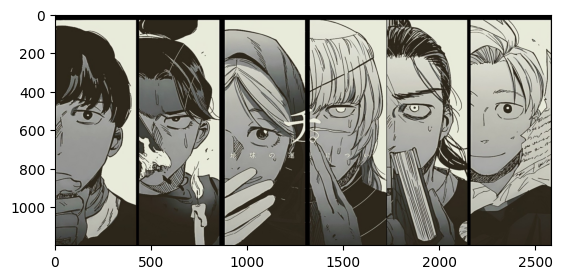

In [ ]:
tokohmasyarakatf= gabung_horizontal(albert, draka, jalenta,badeni, oczy, rafal)
plt.imshow(tokohmasyarakatf)
print(tokohmasyarakatf.shape)

Script dibawah ini merupakan teknik penggabungan citra dengan memanfaatkan fungsi bawaan dari library cv2 yaitu hconcat. hconcat sendiri merupakan fungsi untuk menggabungkan citra secara horizontal.

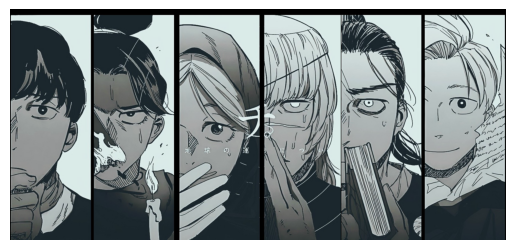

In [ ]:
tokohmasyarakat = cv2.hconcat([albert, draka, jalenta,badeni, oczy, rafal])
plt.imshow(cv2.cvtColor(tokohmasyarakat, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Script dibawah ini merupakan teknik penggabungan citra dengan memanfaatkan fungsi bawaan dari library numpy yaitu hstack. hstack sendiri merupakan fungsi untuk menggabungkan citra secara horizontal.

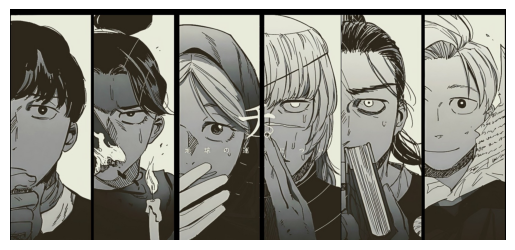

In [ ]:
tokohmasyarakatl = np.hstack((albert, draka, jalenta,badeni, oczy, rafal))
plt.imshow(tokohmasyarakatl)
plt.axis("off")
plt.show()

## 2. EKUALISASI CITRA

Script dibawah digunakan untuk menghasilkan informasi tentang distribusi intensitas piksel pada citra grayscale. Dengan menggunakan citra sebagai input, fungsi ini menghitung berapa kali munculnya setiap intensitas piksel, yang tercermin dalam array jumlahPerGray. Dengan demikian, informasi ini memberikan gambaran tentang seberapa sering intensitas tertentu muncul dalam citra, yang berguna untuk pemrosesan citra lebih lanjut, seperti peningkatan kontras atau deteksi tepi.

In [ ]:
def intensitasDerajatCitra(image):
	tinggi,lebar = image.shape
	jumlahPerGray = np.zeros(256).astype(int)
	for i in range(tinggi):
		for j in range(lebar):
			jumlahPerGray[image[i, j]]+=1

	return jumlahPerGray

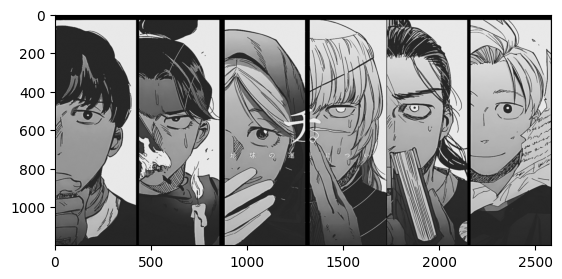

In [ ]:
tokohmasyarakat_gray = cv2.cvtColor(tokohmasyarakatf, cv2.COLOR_RGB2GRAY)
plt.imshow(tokohmasyarakat_gray, cmap ='gray')

Script dibawah ini digunakan untuk membuat dan menampilkan histogram distribusi intensitas piksel (grayscale) dari citra tokohmasyarakatf, serta histogram probabilitas distribusi intensitas piksel. Histogram distribusi intensitas piksel menunjukkan jumlah piksel yang memiliki intensitas tertentu dalam citra, sedangkan histogram probabilitas distribusi intensitas piksel menunjukkan probabilitas kemunculan intensitas piksel dalam citra.

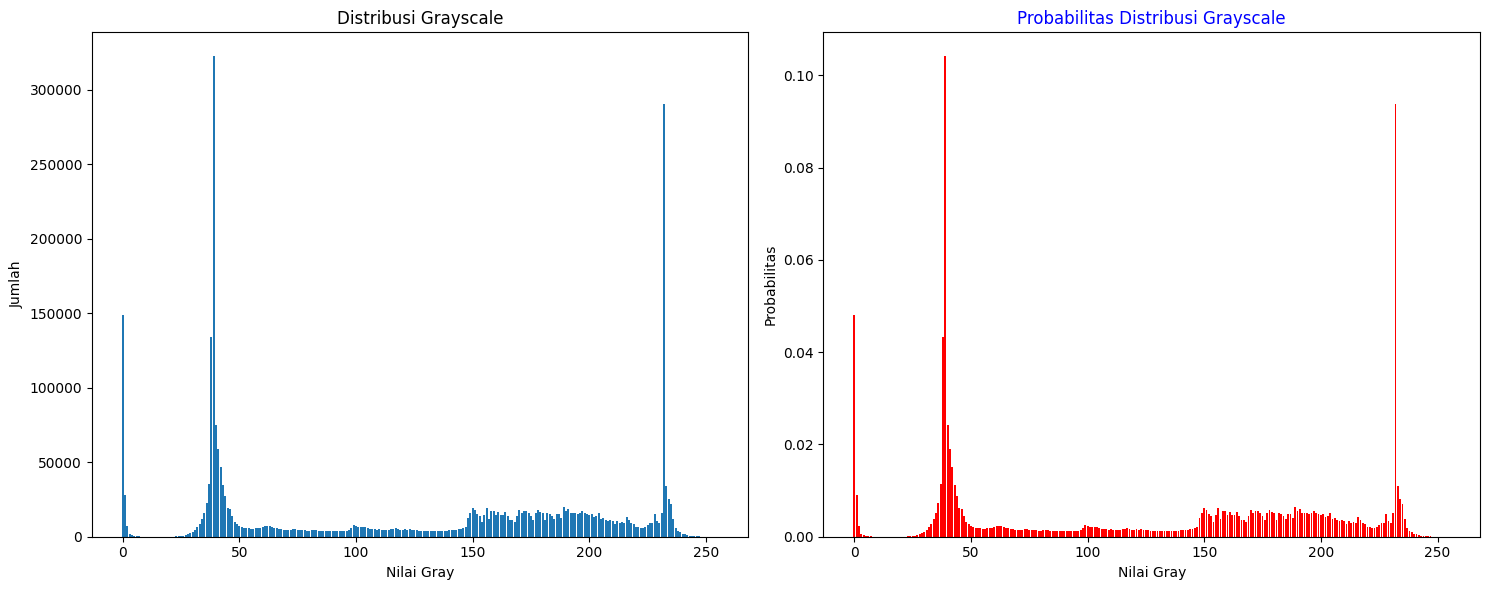

In [ ]:
#membuat index untuk semua grayscale dari 0-255
grayValue = [i for i in range(256)]
intensitasDerajattokoh = intensitasDerajatCitra(tokohmasyarakat_gray)

# menampilkan histogram dalam bentuk probabilitas per grayscale
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].set_title('Distribusi Grayscale')
axs[0].set_xlabel('Nilai Gray')
axs[0].set_ylabel('Jumlah')
axs[0].bar(grayValue, intensitasDerajattokoh)

axs[1].set_title('Probabilitas Distribusi Grayscale', color='blue')
axs[1].set_xlabel('Nilai Gray')
axs[1].set_ylabel('Probabilitas')
axs[1].bar(grayValue, intensitasDerajattokoh / intensitasDerajattokoh.sum(), color='red')

plt.tight_layout()
plt.show()

Script dibawah merupakan implementasi dari fungsi untuk menemukan target dari proses ekualisasi histogram pada citra. Fungsi ini menerima dua parameter: intensitasDerajat, yang merupakan distribusi intensitas piksel dari citra (dalam bentuk array), dan image, yang merupakan citra yang akan diekualisasi histogramnya. Fungsi ini menghasilkan target yang akan digunakan dalam proses ekualisasi histogram pada citra, yang bertujuan untuk meningkatkan kontras citra dengan meratakan distribusi intensitas piksel.

In [ ]:
def findTarget(intensitasDerajat, image):
	tinggi, lebar = image.shape
	distKumulatif = np.zeros(256).astype(float)
	for i in range(256):
		distKumulatif[i] = np.sum(intensitasDerajat[0:i+1])

	normalisasiDistCum = (distKumulatif*255)/(tinggi*lebar)
	normalisasiDistCum = np.round(normalisasiDistCum).astype(int)

	return normalisasiDistCum

Script di bawah digunakan untuk proses ekualisasi histogram pada citra grayscale tokohmasyarakatf. Pertama, target ekualisasi histogram dihitung berdasarkan distribusi intensitas piksel dari citra asli. Kemudian, citra asli dipetakan kembali menggunakan target normalisasi yang telah dihitung, menghasilkan citra yang telah ditingkatkan kontrasnya. Proses ini ditampilkan dengan membandingkan citra asli sebelum ekualisasi dengan citra hasil ekualisasi. Dengan meningkatkan kontras citra melalui ekualisasi histogram, informasi dalam citra menjadi lebih terdistibusi secara merata, yang berguna dalam meningkatkan visualisasi dan analisis citra. Setelah Menampilkan kedua citra, histogram distribusi intensitas piksel sebelum dan setelah proses ekualisasi histogram pada citra tokohmasyarakatf akan ditampilkan. Pertama, distribusi intensitas piksel dari citra hasil ekualisasi dihitung menggunakan fungsi intensitasDerajatCitra. Selanjutnya, plot histogram untuk kedua citra ditampilkan dalam bentuk jumlah piksel per nilai grayscale. Melalui perbandingan histogram, efek dari ekualisasi histogram terhadap distribusi intensitas piksel dapat diamati dengan jelas, yang memberikan wawasan tentang perubahan kontras dan distribusi intensitas piksel dalam citra.

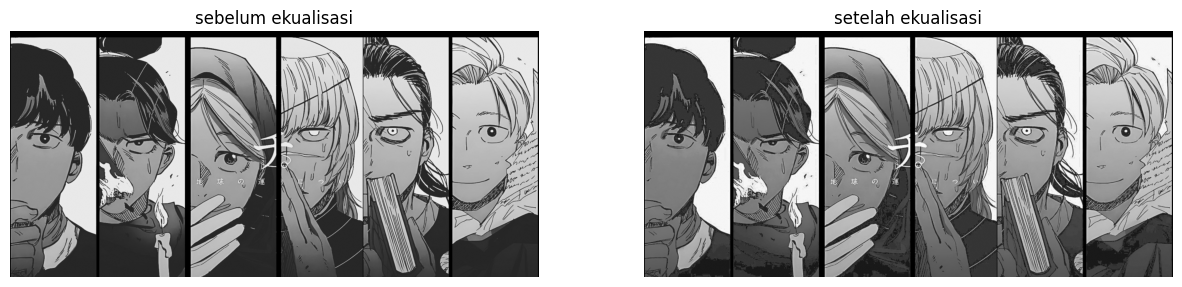

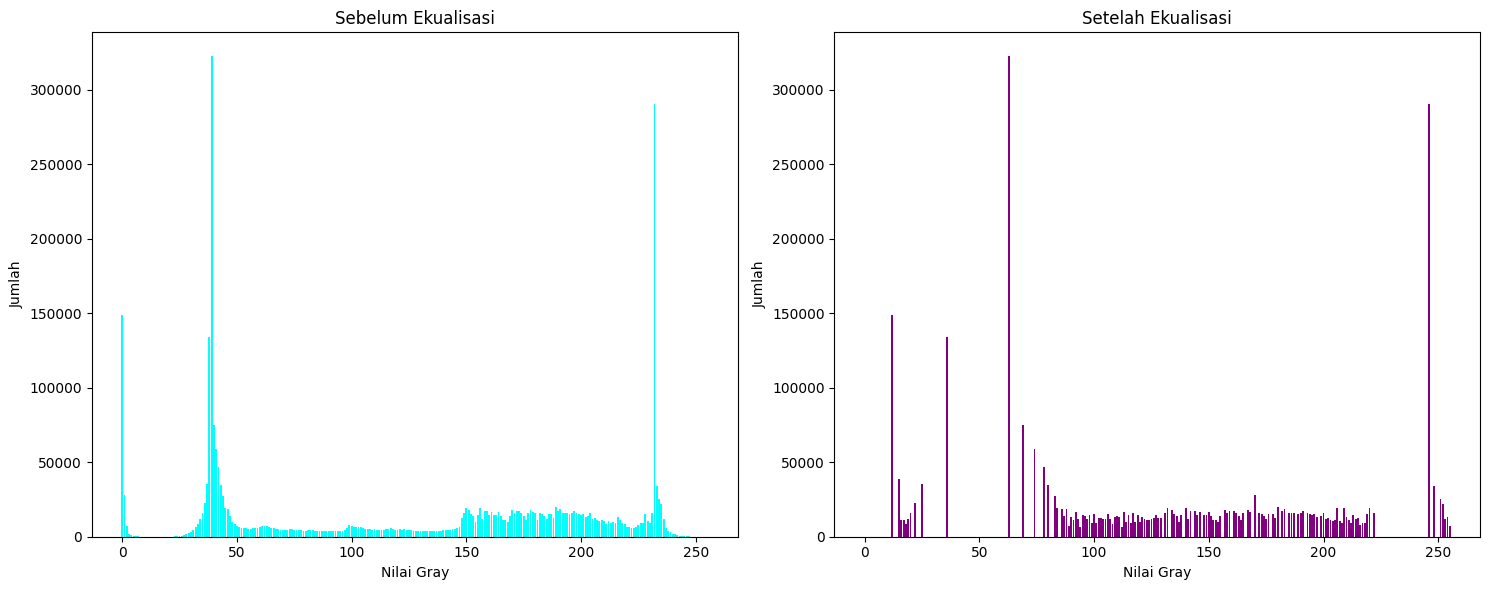

In [ ]:
normalisasiTargettokoh = findTarget(intensitasDerajattokoh, tokohmasyarakat_gray)

tinggi, lebar = tokohmasyarakat_gray.shape
ekualisasitokoh = np.zeros((tinggi, lebar)).astype(np.uint8)
for i in range(tinggi):
	for j in range(lebar):
		ekualisasitokoh[i,j] = normalisasiTargettokoh[tokohmasyarakat_gray[i,j]]

plt.figure(figsize=(15, 15))  
plt.subplot(1, 2, 1)  
plt.imshow(tokohmasyarakat_gray, cmap='gray')
plt.title('sebelum ekualisasi')
plt.axis('off')

plt.subplot(1, 2, 2) 
plt.imshow(ekualisasitokoh , cmap='gray')
plt.title('setelah ekualisasi')
plt.axis('off')

intensitasDerajattokohEkual = intensitasDerajatCitra(ekualisasitokoh)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].set_title('Sebelum Ekualisasi')
axs[0].set_xlabel('Nilai Gray')
axs[0].set_ylabel('Jumlah')
axs[0].bar(grayValue, intensitasDerajattokoh, color='cyan')

axs[1].set_title('Setelah Ekualisasi')
axs[1].set_xlabel('Nilai Gray')
axs[1].set_ylabel('Jumlah')
axs[1].bar(grayValue, intensitasDerajattokohEkual, color='purple')

plt.tight_layout()
plt.show()

# Jawaban soal nomor 2 - Perbandingan Histogram
Berdasarkan hasil pengamatan histogram tersebut, pada histogram sebelum ekualisasi, distribusi nilai intensitas piksel tidak merata. Tampak adanya puncak-puncak tajam pada rentang nilai gray tertentu, sedangkan di area lain jumlah piksel sangat sedikit. Hal ini menunjukkan bahwa gambar awal memiliki kontras rendah dan sebagian besar informasinya terkonsentrasi pada rentang intensitas tertentu saja.
Sementara itu, pada histogram setelah ekualisasi, distribusi nilai intensitas menjadi lebih sedikit merata terutama pada rentang 75- 230. Puncak-puncak tajam yang sebelumnya terlihat menjadi lebih menyebar, menunjukkan bahwa frekuensi piksel pada berbagai tingkat kecerahan lebih. Dengan penyebaran intensitas ini, citra hasil ekualisasi memiliki kontras yang sedikit lebih tinggi, sehingga detail pada area gelap maupun terang menjadi lebih jelas terlihat

Script dibawah ini untuk mendeklarasikan dan menampilkan citra propaganda dengan grayscale untuk keperluan spesifiKasi

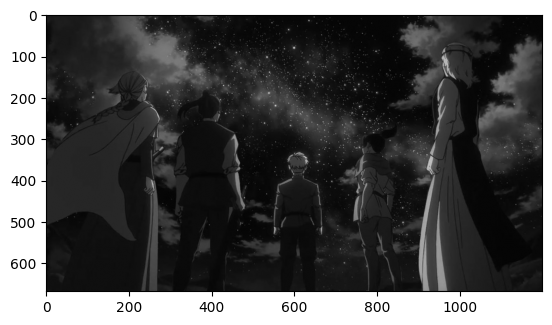

In [ ]:
propoganda = plt.imread("propaganda.jpg")
propoganda2 = cv2.cvtColor(propoganda, cv2.COLOR_RGB2GRAY)
plt.imshow(propoganda2, cmap ='gray')

Script dibawah ini untuk mendeklarasikan dan menampilkan citra propaganda dengan grayscale untuk keperluan spesifiKasi

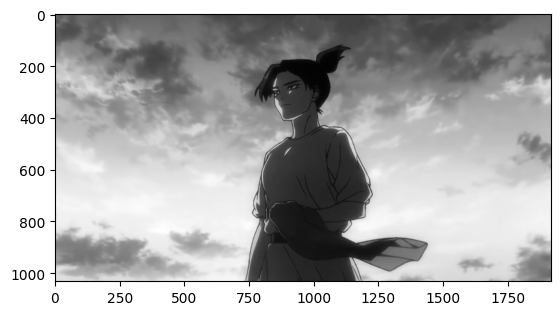

In [ ]:
drakaa = plt.imread("draka.jpg")
draka2 = cv2.cvtColor(drakaa, cv2.COLOR_RGB2GRAY)
plt.imshow(draka2, cmap ='gray')

## 3. EKUALISASI
Script dibawah ini merupakan fungsi spesifikasi histogram. Berbeda dengan ekualisasi histogram biasa yang meratakan distribusi intensitas, spesifikasi histogram bertujuan untuk mengubah histogram suatu citra (image1) agar menyerupai bentuk histogram citra target (image2). Pertama, fungsi menghitung histogram dari kedua citra. Histogram yang diperoleh kemudian dinormalisasi menjadi probabilitas distribusi dengan membagi setiap nilai histogram dengan jumlah total piksel, sehingga didapatkan peluang kemunculan masing-masing intensitas. Selanjutnya, probabilitas dari kedua citra akan dikumulatifkan untuk menggambarkan akumulasi peluang dan nilai intensiitas dari citra.

In [ ]:
def spec(image1, image2):
    hist_image1, _ = np.histogram(image1.flatten(), bins=256, range=[0,256])
    hist_image2, _ = np.histogram(image2.flatten(), bins=256, range=[0,256])
    probability1 = hist_image1 / np.sum(hist_image1)
    probability2 = hist_image2 / np.sum(hist_image2)

    cumulative_distribution1 = np.cumsum(probability1)
    cumulative_distribution2 = np.cumsum(probability2)

    equalized_image = np.zeros_like(image1)

    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            intensity = int(image1[i, j])  
            new_intensity = 255
            for k in range(256):
                if cumulative_distribution1[intensity] <= cumulative_distribution2[k]:
                    new_intensity = k
                    break
            equalized_image[i, j] = new_intensity

    return equalized_image

Script dibawah ini merupakan penggunaan fungsi spesifikasi untuk mengatur intensitas citra sesuai target yang diinginkan yaitu propaganda dan draka

In [ ]:
proakt = spec(tokohmasyarakat_gray, propoganda)
draaktv = spec(tokohmasyarakat_gray, drakaa)

Script di bawah digunakan untuk menampilkan citra setelah dilakukan spesifikasi dan histogramnya.

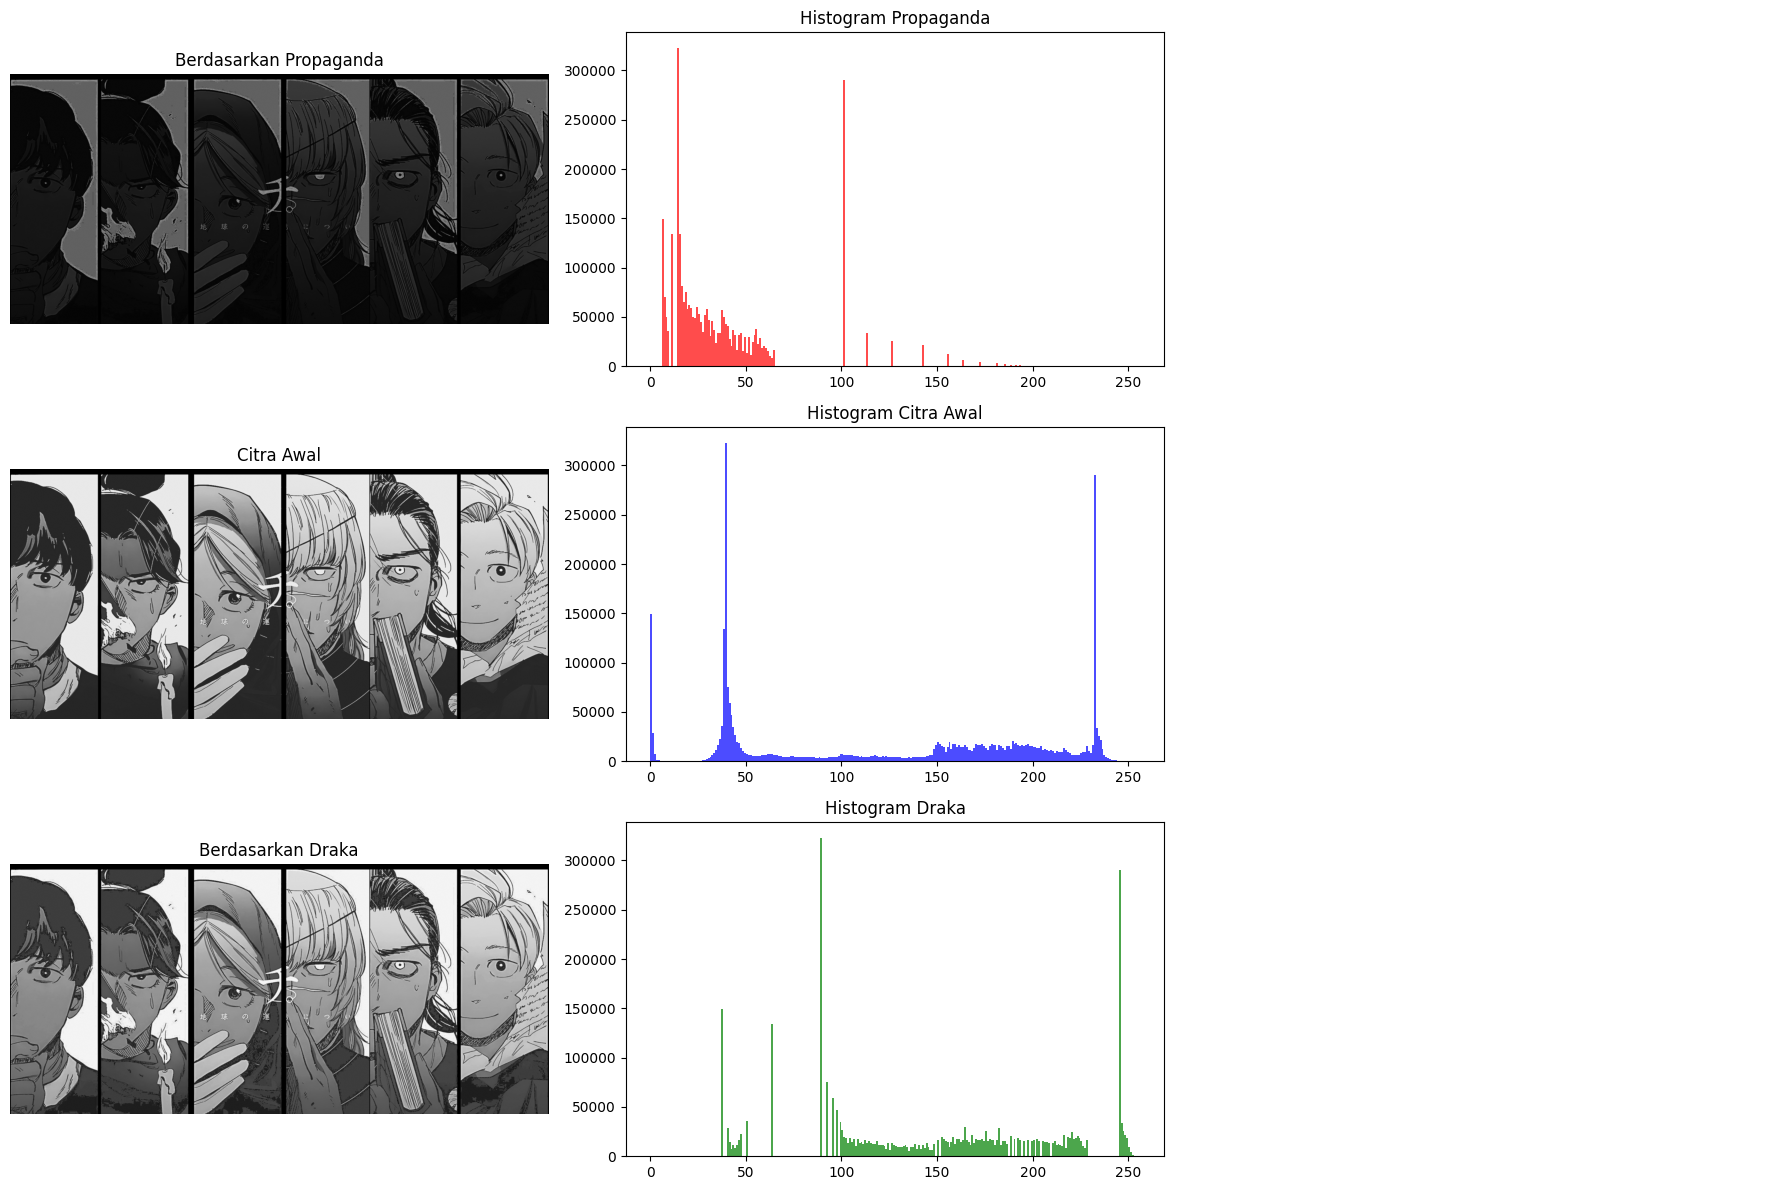

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs[0, 0].imshow(proakt, cmap='gray')
axs[0, 0].set_title('Berdasarkan Propaganda')
axs[0, 0].axis('off')
axs[0, 1].hist(proakt.flatten(), bins=256, range=[0,256], color='red', alpha=0.7)
axs[0, 1].set_title('Histogram Propaganda')
axs[0, 2].axis('off')  # Kosongkan

axs[1, 0].imshow(tokohmasyarakat_gray, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].axis('off')
axs[1, 1].hist(tokohmasyarakat_gray.flatten(), bins=256, range=[0,256], color='blue', alpha=0.7)
axs[1, 1].set_title('Histogram Citra Awal')
axs[1, 2].axis('off')

axs[2, 0].imshow(draaktv, cmap='gray')
axs[2, 0].set_title('Berdasarkan Draka')
axs[2, 0].axis('off')
axs[2, 1].hist(draaktv.flatten(), bins=256, range=[0,256], color='green', alpha=0.7)
axs[2, 1].set_title('Histogram Draka')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

## 4. ANALISIS HASIL SPESIFIKASI
Berdasarkan hasil dari spesifikasi di atas dapat dilihat bahwa : 
1. Spesifikasi berdasarkan propaganda memiliki citra yang lebih gelap terlihat dari citra dan histogramnya yang cenderung ke kiri, hal ini terjadi karena target yaitu citra propaganda memiliki intensitas yang gelap.
2. Spesifikasi berdasarkan draka memiliki citra yang lebih terang dibanding citra awal terlihat dari citra dan histogramnya yang cenderung ke kekana, hal ini terjadi karena target yaitu citra draka memiliki intensitas yang lebih terang. 

## 5. SPESIFIKASI CITRA SEPERTI PRESS CONFERENCE YANG DIMINTA JURNAL MODUL 2

# a. Membuat citra albert dengan spesifikasi draka kemudian citra lainnya dengan spesifikasi propaganda. 
Untuk membuat hal itu dapat digunakan cara: 
1. Pemotongan citra proakt yang merupakan hasil spesifikasi dari tokohmasyarakatf - propaganda, kemudian menghilankan citra albert. Untuk pemotongan dengan menggunakan indeks x dan y dari citranya.
2. Melakukan spesifikasi pada citra albert dengan target tujuan draka menggunakan fungsi spec.
3. Menggabungkan antara citra 1 dan 2 secara horizontal dengan menggunakan fungsi bawaan dari library numpy yaitu hstack.

Text(0.5, 1.0, 'Berdasarkan Propaganda')

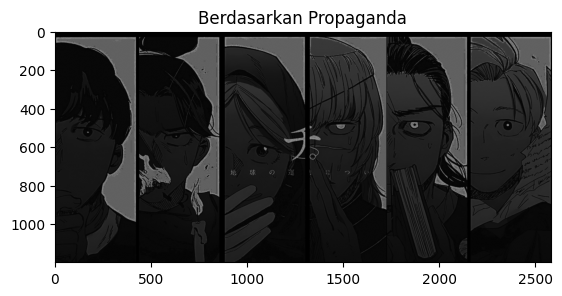

In [ ]:
plt.imshow(proakt,  cmap = 'grey')
plt.title('Berdasarkan Propaganda')

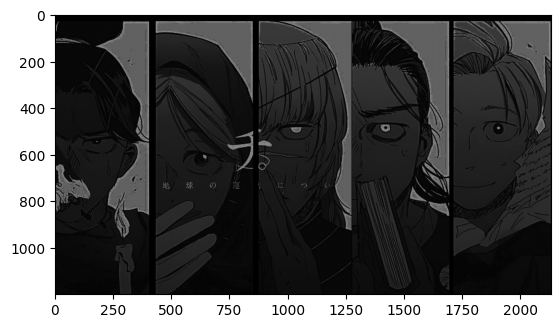

In [ ]:
pintarayu=proakt[0: 1200, 450:2700 ]
plt.imshow(pintarayu, cmap= 'gray')

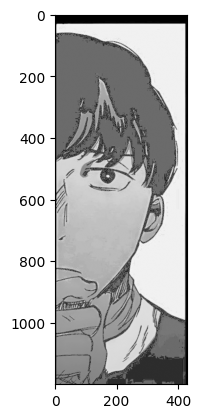

In [ ]:
albertt= cv2.cvtColor(albert, cv2.COLOR_RGB2GRAY)
alberts = spec(albertt, draka2)
plt.imshow(alberts,cmap='gray')


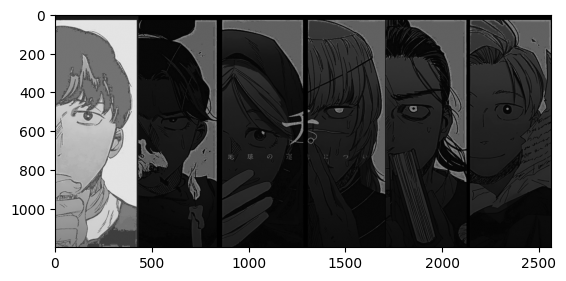

In [ ]:
gabunghehe= np.hstack((alberts, pintarayu))
plt.imshow (gabunghehe,cmap='gray')

# b. Membuat citra unik dimana di beberapa citra karakter memiliki setengah bagian yang di spesificasi denga propaganda dan setengahnya lagi dispesificasi dengan draka.
1. Citra albert akan di spesificasi dengan draka, dan telah dilakukan pada section sebelumnya. 
2. Citra draka, badeni dan oczy akan dibagi menjadi 3 bagian yang mana 2 bagian akan di spesifikasi dengan draka dan 1 bagian dispesificasi dengan propaganda. pada section ini citra tersebut akan dibagi dan dispesificasikan sesuai ketentuan yang diinginkan. setelah bagian dari citra telah dispesifikasi maka citra akan disatukan secara vertikal  dengan menggunakan fungsi bawaan dari library numpy yaitu vstack sesuai dengan karakternya masing masing.
3. Citra jalenta dan rafal akan di spesifikasi dengan propaganda menggunkan fungsi spec. 
4. Terakhir, menggabungkan semua citra karekter secara horizontal dengan menggunakan fungsi bawaan dari library numpy yaitu hstack.

(1200, 442, 3)


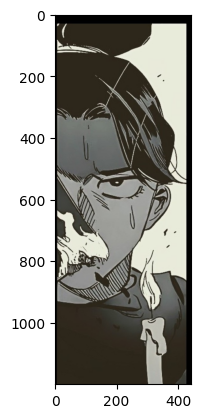

In [ ]:
plt.imshow(draka)
print(draka.shape)

(500, 420)


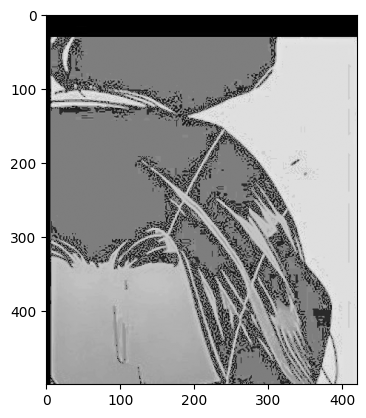

In [ ]:
dra=draka[0:500,0:420]
dr= cv2.cvtColor(dra, cv2.COLOR_RGB2GRAY) 
drags= spec(dr, draka2)
plt.imshow(drags, cmap='gray')
print(drags.shape)

(100, 420)


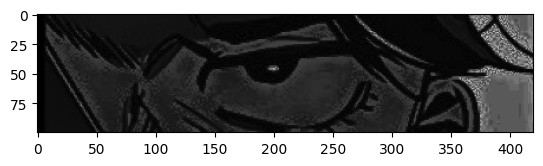

In [ ]:
draks=draka[500:600,0:420]
drak= cv2.cvtColor(draks, cv2.COLOR_RGB2GRAY) 
drag= spec(drak, propoganda)
plt.imshow(drag, cmap='gray')
print(drag.shape)

(600, 420)


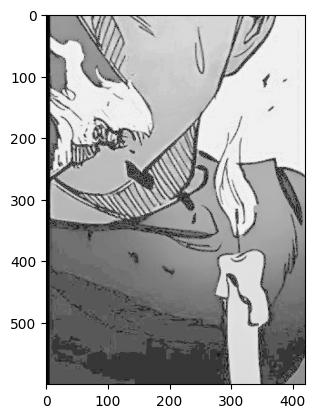

In [ ]:
draksa=draka[600:1600,0:420]
drk= cv2.cvtColor(draksa, cv2.COLOR_RGB2GRAY) 
draf= spec(drk, draka2)
plt.imshow(draf, cmap='gray')
print(draf.shape)

(np.float64(-0.5), np.float64(419.5), np.float64(1199.5), np.float64(-0.5))

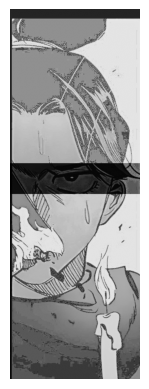

In [ ]:
drug= np.vstack((drags,drag,draf))
plt.imshow (drug,cmap='gray')
plt.axis("off")

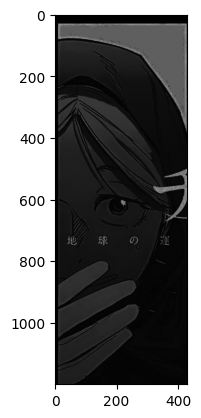

In [ ]:
jalen= cv2.cvtColor(jalenta, cv2.COLOR_RGB2GRAY)
jaln = spec(jalen, propoganda2)
plt.imshow(jaln,cmap='gray')


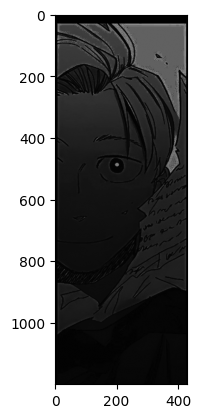

In [ ]:
rafals= cv2.cvtColor(rafal, cv2.COLOR_RGB2GRAY)
raf = spec(rafals, propoganda2)
plt.imshow(raf,cmap='gray')

(1200, 420, 3)


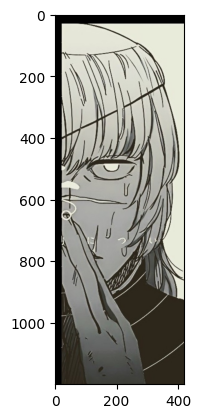

In [ ]:
plt.imshow(badeni)
print(badeni.shape)

(750, 420)


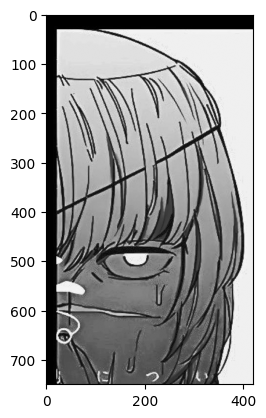

In [ ]:
baden=badeni[0:750,0:420]
biden= cv2.cvtColor(baden, cv2.COLOR_RGB2GRAY) 
bad= spec(biden, draka2)
plt.imshow(bad, cmap='gray')
print(bad.shape)

(100, 420)


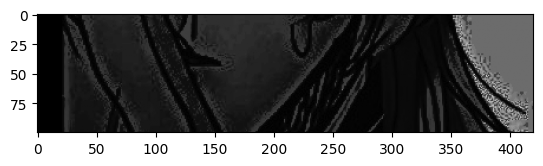

In [ ]:
bade=badeni[750:850,0:420]
bads= cv2.cvtColor(bade, cv2.COLOR_RGB2GRAY) 
bud= spec(bads, propoganda2)
plt.imshow(bud, cmap='gray')
print(bud.shape)

(350, 420)


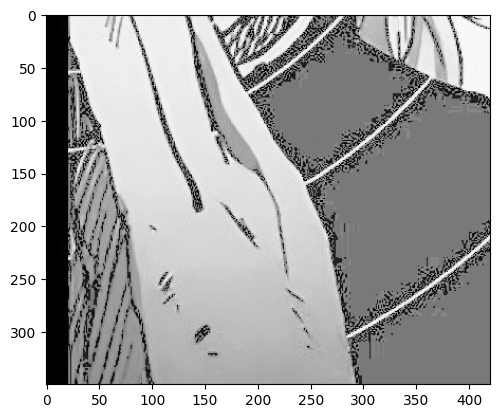

In [ ]:
bed=badeni[850:1600,0:420]
beda= cv2.cvtColor(bed, cv2.COLOR_RGB2GRAY) 
beds= spec(beda, draka2)
plt.imshow(beds, cmap='gray')
print(beds.shape)

(np.float64(-0.5), np.float64(419.5), np.float64(1199.5), np.float64(-0.5))

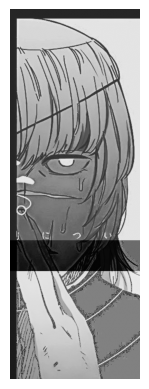

In [ ]:
badas= np.vstack((bad,bud,beds))
plt.imshow (badas,cmap='gray')
plt.axis("off")

In [ ]:
ocz=oczy[0:750,0:420]
oce= cv2.cvtColor(ocz, cv2.COLOR_RGB2GRAY) 
cozy= spec(oce, draka2)
plt.imshow(cozy, cmap='gray')
print(cozy.shape)

(750, 420)


(100, 420)


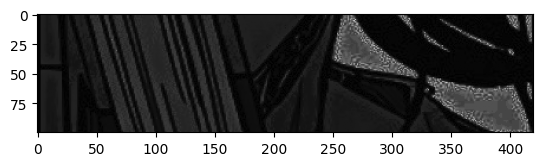

In [ ]:
co=oczy[750:850,0:420]
coz= cv2.cvtColor(co, cv2.COLOR_RGB2GRAY) 
coy= spec(coz, propoganda2)
plt.imshow(coy, cmap='gray')
print(coy.shape)

(350, 420)


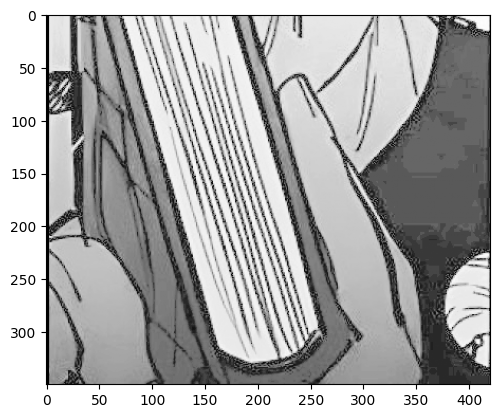

In [ ]:
cop=oczy[850:1600,0:420]
cops= cv2.cvtColor(cop, cv2.COLOR_RGB2GRAY) 
belimakanyuk= spec(cops, draka2)
plt.imshow(belimakanyuk, cmap='gray')
print(belimakanyuk.shape)

(np.float64(-0.5), np.float64(419.5), np.float64(1199.5), np.float64(-0.5))

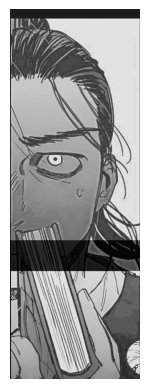

In [ ]:
makanapa= np.vstack((cozy,coy,belimakanyuk))
plt.imshow (makanapa,cmap='gray')
plt.axis("off")

In [ ]:
bakso= np.hstack((alberts, drug, jaln, badas, makanapa, raf))
plt.imshow(bakso, cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(2549.5), np.float64(1199.5), np.float64(-0.5))

## YEYYY BERHASIL